In [13]:
# import the important packages
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import os

# define functions

# reads data from an xml-file
def read_data(file):
    with open(file, 'r') as f:
        data = f.read() 
    bs_data = bs(data, 'xml') 
    return bs_data


# calculates distance based on data, returns a dataframe
def calc_euclidian_distances(bs_data, low, high):
    b_name = bs_data.find_all('name')

    attributes = []
    # finds all values 
    for i in range(len(b_name)):
        attributes.append(b_name[i].get('value'))

    attributes = list(attributes)
    collection = {}
    #print(attributes)
    
    # finds x-, y- and z-values and computes euclidian distance
    # for first values
    for i in range(low, high):
        r = calc(b_name, i)
        collection[attributes[i]] = r

    df = pd.DataFrame(collection)
    return df

# calculation for euclidian distances
def calc(b_name, i):
    a1 = b_name[i].find_all('component')[0].get('data')
    b1 = b_name[i].find_all('component')[1].get('data')
    c1 = b_name[i].find_all('component')[2].get('data')
    x = np.asarray([float(x) for x in a1.split(',')])
    y = np.asarray([float(y) for y in b1.split(',')])
    z = np.asarray([float(z) for z in c1.split(',')])
    r = (x**2 + y**2 + z**2)**0.5
    return r


# gets healthy and pfps lists of people between given indices
def get_lists(low, high):
    healthy_list = []
    path = "../usethis/HEALTHY/"
    low = 0
    for xml_file in os.listdir(path):
        if xml_file.startswith("timeseries"):
            #print(xml_file)
            bs_data = read_data(path + xml_file)
            b_name = bs_data.find_all('name')
            try:
                df1 = calc_euclidian_distances(bs_data, low, high)
                healthy_list.append(df1)
            except:
                print(xml_file + " failed to compute")

    pfps_list = []
    path = "../usethis/PFPS/"
    for xml_file in os.listdir(path):
        if xml_file.startswith("timeseries"):
            #print(xml_file)
            bs_data = read_data(path + xml_file)
            b_name = bs_data.find_all('name')
            try:
                df1 = calc_euclidian_distances(bs_data, low, high)
                pfps_list.append(df1)
            except:
                print(xml_file + " failed to compute")
    return healthy_list, pfps_list

In [14]:
# calculates the difference between the max and min value of each attribute

i = 0
df_list = []
for xml_file in os.listdir("../Timeseries"):
    if xml_file.startswith("timeseries"):
        bs_data = read_data("../Timeseries/" + xml_file)
        b_name = bs_data.find_all('name')
        try:
            df1 = calc_euclidian_distances(bs_data, 0, int(len(b_name)/4))
            df_max = pd.DataFrame(df1.max().to_dict(),index=[df1.index.values[-1]])
            df_min = pd.DataFrame(df1.min().to_dict(),index=[df1.index.values[-1]])
            df1 = df_max.subtract(df_min, fill_value=0)

            df1 = df1.rename(index={100:i})
            df_list.append(df1)

        except:
            print(xml_file + " failed to compute")
        i += 1

result = pd.concat(df_list)
data = result

timeseries-11.xml failed to compute
timeseries-45.xml failed to compute
timeseries-6.xml failed to compute


In [15]:
# first person in the list. Contains the difference between max and min values of the euclidian distance of each attribute

df_list[0]

,Head Angles,L_FCC_VLab,L_FM2_VLab,Left Ankle Angles,Left Foot Contact Angle,Left Foot Progression,Left Hip Angles,Left Knee Angles,Left Pelvic Angles,Left Shoulder Angles,...,Right Hip Angles,Right Knee Angles,Right Pelvic Angles,Right Shoulder Angles,Right Shoulder_Pelvis Angle,Right Wrist Angles,Right_Knee_Ankle_distance,Right_Knee_VLab,Trunk Angles,Trunk Angles_wrt_LAB
0,0.721995,28.637741,34.694822,10.659017,41.435751,41.435751,48.049076,79.523917,1.550203,1.447052,...,47.937395,79.731865,1.551569,3.980441,1.787239,1.334721,0.00677,27.920743,2.069769,1.493842


In [16]:
# calculates the mean of each attribute

i = 0
df_list = []
for xml_file in os.listdir("../Timeseries"):
    if xml_file.startswith("timeseries"):
        bs_data = read_data("../Timeseries/" + xml_file)
        b_name = bs_data.find_all('name')
        try:
            df1 = calc_euclidian_distances(bs_data, 0, int(len(b_name)/4))
            df1 = pd.DataFrame(df1.mean().to_dict(),index=[df1.index.values[-1]])
            
            df1 = df_max.subtract(df_min, fill_value=0)

            df1 = df1.rename(index={100:i})
            df_list.append(df1)

        except:
            print(xml_file + " failed to compute")
        i += 1

result = pd.concat(df_list)
data = result

timeseries-11.xml failed to compute
timeseries-45.xml failed to compute
timeseries-6.xml failed to compute


In [17]:
# first person in the list. Calculated means of the euclidian distance of the person

df_list[0]

,Head Angles,L_FCC_VLab,L_FM2_VLab,Left Ankle Angles,Left Foot Contact Angle,Left Foot Progression,Left Hip Angles,Left Knee Angles,Left Pelvic Angles,Left Shoulder Angles,...,Right Hip Angles,Right Knee Angles,Right Pelvic Angles,Right Shoulder Angles,Right Shoulder_Pelvis Angle,Right Wrist Angles,Right_Knee_Ankle_distance,Right_Knee_VLab,Trunk Angles,Trunk Angles_wrt_LAB
0,2.551169,34.256505,33.836752,9.593549,44.561493,44.561493,53.707994,89.811432,1.201482,2.00385,...,56.232567,93.300187,1.105054,1.945897,2.550047,3.133071,0.003167,29.977125,2.405493,1.043788


In [22]:
# get level1 for healthy and pfps people

level1_healthy, level1_pfps = get_lists(0,int(len(b_name)/4))

level2_healthy, level2_pfps = get_lists(int(len(b_name)/4),int(len(b_name)/2))

level3_healthy, level3_pfps = get_lists(int(len(b_name)/2),3*int(len(b_name)/4))

level4_healthy, level4_pfps = get_lists(3*int(len(b_name)/4),len(b_name))


timeseries-10.xml failed to compute
timeseries-44.xml failed to compute
timeseries-10.xml failed to compute
timeseries-44.xml failed to compute
timeseries-10.xml failed to compute
timeseries-44.xml failed to compute
timeseries-10.xml failed to compute
timeseries-23.xml failed to compute
timeseries-44.xml failed to compute
timeseries-57.xml failed to compute
timeseries-63.xml failed to compute
timeseries-56.xml failed to compute


In [23]:
# first person in the list

level1_healthy[0]

,Head Angles,L_FCC_VLab,L_FM2_VLab,Left Ankle Angles,Left Foot Contact Angle,Left Foot Progression,Left Hip Angles,Left Knee Angles,Left Pelvic Angles,Left Shoulder Angles,...,Right Hip Angles,Right Knee Angles,Right Pelvic Angles,Right Shoulder Angles,Right Shoulder_Pelvis Angle,Right Wrist Angles,Right_Knee_Ankle_distance,Right_Knee_VLab,Trunk Angles,Trunk Angles_wrt_LAB
0,36.077128,74.156390,61.522083,14.866409,30.461526,30.461526,93.740546,114.150080,23.807862,71.258949,...,92.655938,115.651560,23.324112,64.391390,11.339072,24.850557,40.074312,30.778223,25.393341,48.225960
1,36.042328,73.964350,60.886953,15.741897,28.431735,28.431735,93.941978,113.249545,23.828834,71.230132,...,93.132789,115.096344,23.328268,64.378194,11.402649,24.921747,40.075199,30.634381,25.415686,48.244632
2,36.010443,73.817732,60.322397,16.600310,26.392707,26.392707,94.008636,112.187496,23.841408,71.207181,...,93.500851,114.375540,23.325114,64.357618,11.465715,24.987195,40.075906,30.519699,25.449624,48.269197
3,35.983564,73.718372,59.830213,17.438402,24.351981,24.351981,93.942252,110.973029,23.845063,71.191632,...,93.708567,113.492244,23.312650,64.331293,11.527538,25.046716,40.076619,30.432839,25.496228,48.299061
4,35.963446,73.668373,59.413166,18.250606,22.318761,22.318761,93.744409,109.613164,23.839357,71.184062,...,93.763841,112.447295,23.289200,64.300620,11.587848,25.100142,40.077272,30.373257,25.555991,48.333395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,36.034294,75.313181,64.680720,11.254317,38.366798,38.366798,91.753583,116.095216,23.688197,71.383559,...,89.839780,116.358311,23.265866,64.368834,11.079971,24.405949,40.072291,31.622070,25.460185,48.279090
97,36.011573,74.978494,63.803030,12.190805,36.401997,36.401997,92.455380,115.865345,23.732581,71.366160,...,90.738506,116.441097,23.280788,64.396790,11.128481,24.498776,40.073015,31.359723,25.453773,48.276618
98,35.982883,74.674703,62.980092,13.119321,34.414351,34.414351,93.016522,115.463190,23.771870,71.340767,...,91.535104,116.365308,23.294906,64.413723,11.184054,24.588211,40.073758,31.129460,25.452099,48.278737
99,35.950286,74.405590,62.216011,14.035716,32.406200,32.406200,93.463820,114.890722,23.805334,71.311150,...,92.276082,116.129092,23.307174,64.420221,11.244316,24.673616,40.074557,30.930694,25.456770,48.286061


Text(0, 0.5, 'Lefts')

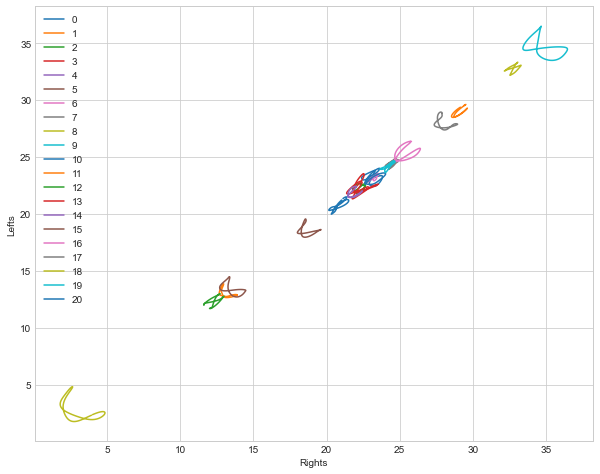

In [25]:
plt.figure(figsize = (10,8))
index = 0

for person in level1_healthy:
    try: 
        plt.plot(person['Right Pelvic Angles'], person['Left Pelvic Angles'], label = index)
    except: 
        print("fail :(")
    index += 1
plt.legend()
plt.xlabel('Rights')
plt.ylabel('Lefts')